# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement

To improve the classification performance of the Fashion MNIST images

## Learning Objectives

At the end of the experiment, you will be able to :

* Understand the Feature extraction
* Know how PCA affects the classification accuracy
* Train the classifier with PCA
* Classify using MLP with different parameters

In [ ]:
#@title Mini Hackathon Walkthrough Video
from IPython.display import HTML

HTML("""<video width="500" height="300" controls>
  <source src="https://cdn.talentsprint.com/aiml/aiml_2020_b14_hyd/experiment_details_backup/ImageClassification_Improveperformance.mp4" type="video/mp4">
</video>
""")

## Dataset

### History
The original MNIST dataset contains handwritten digits. People from AI/ML or the Data Science community love this dataset. They use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset they would try on. As per popular belief, If the algorithm doesn’t work on MNIST, it won’t work at all. Well, if the algorithm works on MNIST, it may still fail on other datasets.


As per the recent [paper](https://www.ijrte.org/wp-content/uploads/papers/v8i2/B3092078219.pdf) describing about Fashion-MNIST, It is a dataset recomposed from the product pictures of Zalando’s websites. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms, as it shares the same image size, data format and the structure of training and testing splits.

There are some good reasons for the challenges faced by MNIST dataset:

* MNIST is too easy - Neural networks can achieve 99.7% on MNIST easily, and similarly, even classic ML algorithms can achieve 97%. 

* MNIST is overused - Almost everyone who has experience with deep learning has come across MNIST at least once.

* MNIST cannot represent modern CV task


### Description

The dataset chosen for this experiment is Fashion-MNIST. The dataset is made up of 28x28 grayscale images of 70,000 fashion products from 10 categories, with 7,000 images per category. The training set has 60,000 images and the test set has 10,000 images. 

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

**Labels / Classes**

0 - T-shirt/top

1 - Trouser

2 - Pullover

3 - Dress

4 - Coat

5 - Sandal

6 - Shirt

7 - Sneaker

8 - Bag

9 - Ankle boot

## Grading = 20 Marks

## Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2002085" #@param {type:"string"}


In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9160301324" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M2_Mini_Hackathon1_ImageClassification_ImprovePerformance" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")  
    from IPython.display import HTML, display
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Mini-Hackathon/fashion.zip")
    ipython.magic("sx unzip fashion.zip")
    #ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/fashion-mnist_test.csv")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return


def submit_notebook():
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getInclassSupport() and getOnlineSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_inclass_mentor": Inclass_support,
              "feedback_online_mentor" : Online_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  
def getInclassSupport():
  try:
    if not Inclass_support:
      raise NameError
    else:
      return Inclass_support
  except NameError:
    print ("Please answer Inclass support Question")
    return None
  
  
def getOnlineSupport():
  try:
    if not Online_support:
      raise NameError
    else:
      return Online_support
  except NameError:
    print ("Please answer Online support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


### Importing Required Packages

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

## **Stage 1:** Classify with raw features

### 3 Marks -> Get the features and labels of Fashion MNIST train data

1. Extract the features of the images

   Hint: [Link](https://www.analyticsvidhya.com/blog/2019/08/3-techniques-extract-features-from-image-data-machine-learning-python/)

2. Convert the features to numpy array

3. Normalize the features

3. Convert the categorical value to the numerical

5. Plot the first 5 images



In [14]:
df = pd.read_csv('/content/fashion/index_train.csv')
Images = list(df['image'])
categories = list(df['category'])

In [ ]:
df.describe()

,category,image
count,50000,50000
unique,10,50000
top,T-shirt,img/fashion39115.png
freq,5058,1


In [ ]:
from skimage.io import imread, imshow
image = imread('/content/fashion/img/fashion10948.png', as_gray=True)
print('\n\nShape of the image = ',image.shape)



Shape of the image =  (28, 28)


In [15]:
# YOUR CODE HERE
# For extracting the pixel values of all the images
from skimage.io import imread, imshow
features = []
image_plot = []
for i in range(len(Images)):
  file_path = '/content/fashion/'+Images[i]
  image = imread(file_path, as_gray=True)
  print('\n\nShape of the image = ',image.shape)
  image_plot.append(image)
  # create features
  feature = np.reshape(image, (28*28))
  # shape of feature array
  print('\n\nShape of the feature array = ',feature.shape)
  features.append(feature)

Streaming output truncated to the last 5000 lines.
Shape of the feature array =  (784,)


Shape of the image =  (28, 28)


Shape of the feature array =  (784,)


Shape of the image =  (28, 28)


Shape of the feature array =  (784,)


Shape of the image =  (28, 28)


Shape of the feature array =  (784,)


Shape of the image =  (28, 28)


Shape of the feature array =  (784,)


Shape of the image =  (28, 28)


Shape of the feature array =  (784,)


Shape of the image =  (28, 28)


Shape of the feature array =  (784,)


Shape of the image =  (28, 28)


Shape of the feature array =  (784,)


Shape of the image =  (28, 28)


Shape of the feature array =  (784,)


Shape of the image =  (28, 28)


Shape of the feature array =  (784,)


Shape of the image =  (28, 28)


Shape of the feature array =  (784,)


Shape of the image =  (28, 28)


Shape of the feature array =  (784,)


Shape of the image =  (28, 28)


Shape of the feature array =  (784,)


Shape of the image =  (28, 28)


Shape of the 

In [7]:
# YOUR CODE HERE
# For converting to numpy array
feature_array = np.array(features)
feature_array.shape,len(features) 

((50000, 784), 50000)

In [8]:
image_arry = np.array(image_plot)

In [16]:
# YOUR CODE HERE
# For normalizing the features
from sklearn import preprocessing
normalized_features = preprocessing.normalize(features)

In [ ]:
features.shape

In [18]:
# YOUR CODE HERE
# For getting the numerical labels
cleanup_nums = {"category": {"T-shirt": 0, "top": 0, "Trouser": 1, "Pullover": 2, "Dress": 3, "Coat": 4, "Sandal": 5, "Shirt": 6, "Sneaker": 7, 
                               "Bag": 8, "Ankle boot": 9}}

df.replace(cleanup_nums, inplace=True)
df.head()

,category,image
0,8,img/fashion10000.png
1,7,img/fashion10001.png
2,6,img/fashion10002.png
3,8,img/fashion10003.png
4,7,img/fashion10004.png


In [22]:
labels = list(df['category'])
labels_arr = np.array(labels)
feature_array = np.array(features)
normalized_features_arr = np.array(normalized_features)
normalized_features_arr.shape

(50000, 784)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f830b832da0>,
 <matplotlib.image.AxesImage at 0x7f830b7a0588>)

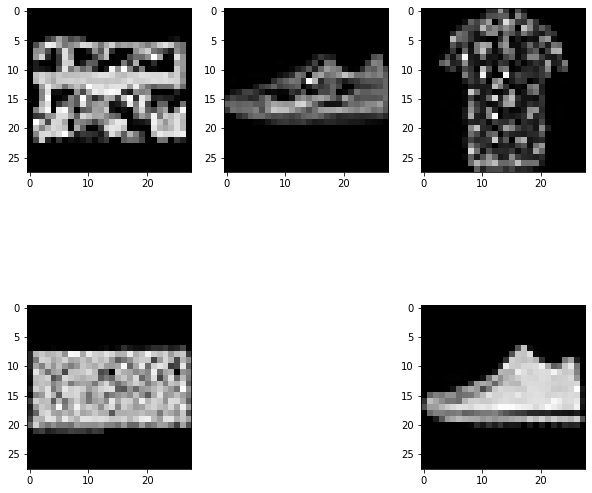

In [ ]:
# YOUR CODE HERE
# For plotting first 5 images
# visualizing images
i = 0
plt.figure(figsize=(10,10))
plt.subplot(231), plt.imshow(image_arry[i], cmap='gray')
plt.subplot(232), plt.imshow(image_arry[i+1], cmap='gray')
plt.subplot(233), plt.imshow(image_arry[i+2], cmap='gray')
plt.subplot(234), plt.imshow(image_arry[i+3], cmap='gray')
plt.subplot(236), plt.imshow(image_arry[i+5], cmap='gray')

### 3 Marks -> Train the MLP classifier on raw features

1. Split the data

2. Train the MLP classifier with different parameters

3. Get the accuracy score

In [31]:
# YOUR CODE HERE
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test =  train_test_split(normalized_features_arr, labels_arr, stratify=labels_arr, test_size=0.33, random_state=1)

In [32]:
clf = MLPClassifier(random_state=2020, hidden_layer_sizes= (900,700,500,100), max_iter=500).fit(x_train,y_train)
#clf.score(x_test,y_test)
y_predict = clf.predict(x_test)
accuracy_score(y_test,y_predict)

0.8914545454545455

In [ ]:
clf_t = MLPClassifier(random_state=2020, max_iter=300).fit(x_train,y_train)

In [ ]:
x_train, x_test, y_train, y_test =  train_test_split(feature_array, labels_arr, stratify=labels_arr, random_state=2020)
clf_tf = MLPClassifier(random_state=2020,hidden_layer_sizes= (300,200),max_iter=300).fit(x_train,y_train)
y_predict = clf_tf.predict(x_test)
accuracy_score(y_test,y_predict)

0.88504

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
predicted_labels = neigh.predict(x_test)
print(accuracy_score(y_test,predicted_labels))

## **Stage 2:** Classify with PCA features

Principal component analysis can be used to reduce the dimensions of an image and project back the data from the reduced space to reconstruct the image

### 1 Mark -> Plot the explained variance ratio

In [ ]:
pca.n_components = 784
pca_data = pca.fit_transform(arr_features)
explained_var_ratio = pca.explained_variance_ratio_
explained_var_ratio

In [ ]:
plt.figure(1, figsize=(6, 4))
plt.clf
plt.plot(explained_var_ratio, linewidth=2)
#plt.axis('tightpplt.grid()')
plt.xlabel('n_components')
plt.ylabel('explained_var_ratio')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
#plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

<BarContainer object of 3 artists>

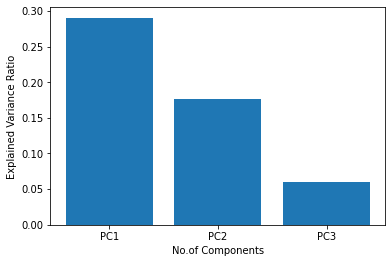

In [ ]:
# YOUR CODE HERE
pca=PCA(n_components=3).fit(feature_array)
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
X = ['PC1', 'PC2', 'PC3']
Y = pca.explained_variance_ratio_
plt.xlabel('No.of Components')
plt.ylabel('Explained Variance Ratio')
plt.bar(X,Y)

In [ ]:
pca.explained_variance_ratio_

array([0.29037007, 0.17704546, 0.06031755])

<BarContainer object of 3 artists>

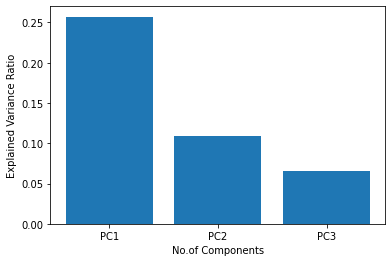

In [ ]:
pca_normal=PCA(n_components=3).fit(normalized_features)
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
X = ['PC1', 'PC2', 'PC3']
Y = pca_normal.explained_variance_ratio_
plt.xlabel('No.of Components')
plt.ylabel('Explained Variance Ratio')
plt.bar(X,Y)

In [ ]:
pca_normal.explained_variance_ratio_

array([0.25710649, 0.10875097, 0.0660402 ])

### 2 Marks -> Apply PCA on normalized features with different components

In [ ]:
# YOUR CODE HERE
pca_n = PCA(n_components=4)
data_red_normalization = pca_n.fit_transform(normalized_features)

In [ ]:
# YOUR CODE HERE
pca_nt = PCA(n_components=0.99)
data_red = pca_nt.fit_transform(normalized_features)

### 2 Marks -> Train the MLP classifier with PCA features

1. Train the MLP classifier with different parameters

2. Get the accuracy score

In [ ]:
# YOUR CODE HERE
x_train, x_test, y_train, y_test =  train_test_split(data_red_normalization, labels_arr, stratify=labels_arr, random_state=2020)
clf_pca = MLPClassifier(random_state=2020, max_iter=200)
clf_pca.fit(x_train,y_train)
#clf_pca.score(x_test,y_test)
y_predict = clf_pca.predict(x_test)
accuracy_score(y_test,y_predict)

0.70576

In [ ]:
# YOUR CODE HERE
x_train, x_test, y_train, y_test =  train_test_split(data_red, labels_arr, stratify=labels_arr,test_size=0.33, random_state=2000)
clf_pcat = MLPClassifier(random_state=2000,hidden_layer_sizes= (500,400,100), max_iter=500).fit(x_train,y_train)
# #clf_pca.score(x_test,y_test)
y_predict = clf_pcat.predict(x_test)
accuracy_score(y_test,y_predict)

0.8872727272727273

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)
parameters = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],'activation': ['tanh', 'logistic', 'relu'],'solver': ['sgd', 'adam'],'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],}   
from sklearn.model_selection import GridSearchCV
gsModel = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)
gsModel.fit(x_train, y_train)
print(gsModel.score(x_train, y_train))
print(gsModel.best_params_)
y_pred_gs = gsModel.best_estimator_.predict(x_test)
print(accuracy_score(y_test, y_pred_gs)) 


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

data_red, labels_arr = make_classification(n_samples=50000, random_state=1)
x_train, x_test, y_train, y_test =  train_test_split(data_red, labels_arr, stratify=labels_arr, random_state=1)
clf_pcab = MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train)
# clf_pca = MLPClassifier(random_state=2020, max_iter=200)
# clf_pca.fit(x_train,y_train)
clf_pcab.score(x_test,y_test)
y_predict = clf_pcab.predict(x_test)
accuracy_score(y_test,y_predict)


0.91568

## **Stage 3:**Test Evaluation

### Expected performance of test evaluation is above 90%

### 4 Marks -> Evaluate model with the given test data

1.  Extract the features of the test data

2. Convert the Categorical value into numericals as given for the train data 

2.  Pass through the model and verify the accuracy

In [23]:
df_test = pd.read_csv('/content/fashion/index_test.csv')
Images = list(df_test['image'])
categories = list(df_test['category'])

In [ ]:
# YOUR CODE HERE for getting the features of the test data.
Test_features =[] #Do not change the name as it is used for the mentors evaluation
for i in range(len(Images)):
  file_path = '/content/fashion/'+Images[i]
  image = imread(file_path, as_gray=True)
  print('\n\nShape of the image = ',image.shape)
  image_plot.append(image)
  # create features
  feature = np.reshape(image, (28*28))
  # shape of feature array
  print('\n\nShape of the feature array = ',feature.shape)
  Test_features.append(feature)

In [ ]:
sum_rows = Test_features.sum(axis=1)
normal_features = Test_features/sum_rows[:,np.newaxis]
print(normal_features)

In [26]:
normalized_test_features = preprocessing.normalize(Test_features)

In [27]:
# YOUR CODE HERE for getting the numerical labels as defined in train data
Test_labels=[] #Do not change the name as it is used for the mentors evaluation
cleanup_nums = {"category": {"T-shirt": 0, "top": 0, "Trouser": 1, "Pullover": 2, "Dress": 3, "Coat": 4, "Sandal": 5, "Shirt": 6, "Sneaker": 7, 
                               "Bag": 8, "Ankle boot": 9}}

df_test.replace(cleanup_nums, inplace=True)
df_test.head()

,category,image
0,9,img/fashion0.png
1,0,img/fashion1.png
2,0,img/fashion2.png
3,3,img/fashion3.png
4,0,img/fashion4.png


In [28]:
Test_labels = df_test['category']

In [29]:
Test_features = np.array(normalized_test_features)
Test_labels = np.array(Test_labels)

In [33]:
model = clf
#data = pca_nt.transform(Test_features)
predicted_values = model.predict(Test_features)
score = accuracy_score(predicted_values, Test_labels)
print(score)

0.8881


In [ ]:
#clf_test = MLPClassifier(random_state=1, max_iter=300)
#x_train, x_test, y_train, y_test =  train_test_split(Test_features, Test_labels, stratify=Test_labels, random_state=2020)
#clf_n = MLPClassifier(random_state=2020, max_iter=200).fit(x_train,y_train)
#model = clf_n
model = clf

In [ ]:
# Give the model name 
predicted_values = model.predict(Test_features)
accuracy_score(predicted_values,Test_labels)

0.9143

## **Stage 4:** Report Analysis

### 5 Marks -> Provide your observations on the following:

1. Mention all the steps you have followed 

2. Explain each step which worked well to improve the accuracy 

3. Explain each step which did not work well to improve the accuracy 

In [ ]:
# YOUR TEXT HERE


*   I've extracted the features from the given data usiing link provided and got the labels respectively.
*   Normalized the features.


*   Plotted first five images using sublots.
*   By using MLP classifier with the normalized features and the labels got the accuracy score upto 88.2%.


*   With PCA features plotted the explained variance ratio of 3 components.
*   With normalized PCA features using MLP classiier got accuracy score around 70%.


*   Did the same with Test data got accuracy score around 91.4%.
 

---



*   Changing ranndom state and max iterations helped to attain the accuracy.

